In [1]:
import parmed as pmd
print(pmd.__version__)
#import MDAnalysis as mda
import os
import numpy as np
#from parmed import load_file as lf
import MDAnalysis
from matplotlib import pyplot as plt


3.1.0+15.g8ea11835


In [3]:
a = pmd.load_file('3rde.prmtop', xyz='frames_8784_3.0/frame_163.pdb')

In [43]:
c = a[':WAT&:HXA<@15|:Na+&:HXA<@15|:1-555']
print(c)

<AmberParm 9783 atoms; 907 residues; 9826 bonds; PBC (orthogonal); parametrized>


In [113]:
a2 = lf('3rde.prmtop', xyz='frames_8784_3.5_8784_4.0_8784_4.5/frame_4.pdb')

In [114]:
d2 = a2[':WAT&:HXA<@15|:Na+&:HXA<@15|(!:WAT&!:Na+&!:Cl-)']
print(d2)

<AmberParm 9783 atoms; 907 residues; 9826 bonds; PBC (orthogonal); parametrized>


In [68]:
d.box = None

In [115]:
d2.write_parm('hola2.prmtop')
d2.save('hola2.inpcrd')

In [72]:
pdb = mda.Universe('frames_8784_3.0/frame_4.pdb')

In [99]:
#pdb_sel = 
print(pdb.select_atoms('resid 555').residues)
#print(pdb_sel.residues)

<ResidueGroup [<Residue HXA, 555>]>


In [ ]:
pdb.select_atoms('resid HXA or resname HXA')

In [5]:
a = pmd.load_file('3rde.prmtop', xyz='qmmm_models/qmmm_model_4.pdb')
a = a[':WAT&:HXA<@15|:Na+&:HXA<@15|:1-555']
a.box = None
a.strip(selection=':WAT&!:HXA<@15')
a.strip(selection=':Na+&!:HXA<@15')
a.strip(selection=':Cl-&!:HXA<@15')

ValueError: cannot reshape array of size 26523 into shape (63455,3)

In [ ]:
a.write_parm('hola.prmtop')

In [ ]:
a.save('hola.inpcrd')

In [9]:
os.path.abspath('frames_8784_3.0/frame_163.pdb')

'/home/mcanyelles/git/pyloxr/frames_8784_3.0/frame_163.pdb'

In [15]:
if len(str(os.path.abspath('frames_8784_3.0/frame_163.pdb')).split("/")) != 1:
    print('heey')
elif len(str(os.path.abspath('frames_8784_3.0/frame_163.pdb')).split("\\")) != 1:
    primt('hooo')

heey


1 0.7608667153933504
2 0.6440678542315054
3 0.574561939943283
4 0.5246366685333441
5 0.4877195268827608
6 0.4572748450707666
7 0.4330902627985282
8 0.4130202057189272
9 0.3957952442227343
10 0.3804370432487341
11 0.3666425854575724
12 0.3536926969683847
13 0.34220689086150746
14 0.3330426446251498
15 0.32473993950753943
16 0.3169795237689788
17 0.3095917343843721
18 0.30353747535933556
19 0.29727607351817936
20 0.2928183004132636


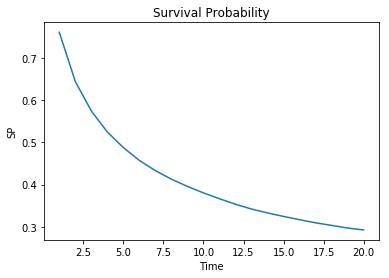

In [14]:
import MDAnalysis
from MDAnalysis.analysis.waterdynamics import SurvivalProbability as SP
import matplotlib.pyplot as plt

universe = MDAnalysis.Universe('3rde.prmtop', '5_prod_07.nc')
selection = "resname WAT and sphzone 12.3 (resid 555) "
sp = SP(universe, selection)#, verbose=True)
sp.run(start=0, stop=100, tau_max=20)
tau_timeseries = sp.tau_timeseries
sp_timeseries = sp.sp_timeseries

# print in console
for tau, sp in zip(tau_timeseries, sp_timeseries):
      print("{time} {sp}".format(time=tau, sp=sp))

# plot
plt.xlabel('Time')
plt.ylabel('SP')
plt.title('Survival Probability')
plt.plot(tau_timeseries, sp_timeseries)
plt.show()

Exception ignored in: <object repr() failed>
Traceback (most recent call last):
  File "/Users/mikicanyelles/miniconda3/envs/py_env/lib/python3.6/site-packages/MDAnalysis/coordinates/base.py", line 2105, in __del__
    self.close()
  File "/Users/mikicanyelles/miniconda3/envs/py_env/lib/python3.6/site-packages/MDAnalysis/coordinates/TRJ.py", line 607, in close
    if self.trjfile is not None:
AttributeError: 'NCDFReader' object has no attribute 'trjfile'
/Users/mikicanyelles/miniconda3/envs/py_env/lib/python3.6/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/mikicanyelles/miniconda3/envs/py_env/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/mikicanyelles/miniconda3/envs/py_env/lib/python3.6/site-packages/MDAnalysis/lib/distances.py:533: RuntimeWarning: invalid value encountered in less_equal
  mask 

ValueError: x and y must have same first dimension, but have shapes (0,) and (100,)

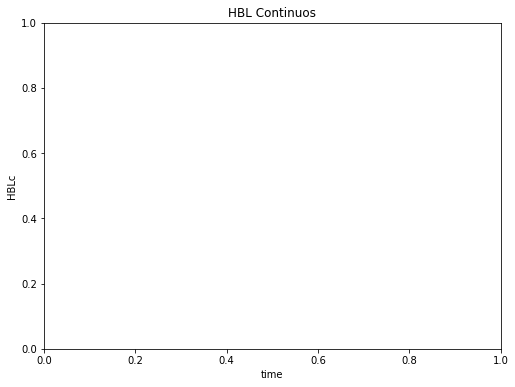

In [9]:
#import MDAnalysis
from MDAnalysis.analysis.waterdynamics import HydrogenBondLifetimes as HBL

u = MDAnalysis.Universe('3rde.prmtop', '5_prod_09.nc')
selection1 = "resname WAT and sphzone 6.0 protein and resid 555"
selection2 = "resid 555"
DEFAULT_DONORS = {'AMBER14FF' : ('O1', 'O2', 'ND1', 'ND2', 'NE1', 'NE2', 'Cl', 'OH')}
DEFAULT_ACCEPTORS = {'AMBER14FF' : ('H1', 'H2', 'H3', 'HH', 'HW', 'HO')}
HBL_analysis = HBL(u, selection1, selection2, 0, 100, 100)#, donor=('O1'), acceptor=('H1', 'H2'))
HBL_analysis.run()
time = 0
#now we print the data ready to plot. The first two columns are the HBLc vs t
#plot and the second two columns are the HBLi vs t graph
#for HBLc, HBLi in HBL_analysis.timeseries:
#    print("{time} {HBLc} {time} {HBLi}".format(time=time, HBLc=HBLc, HBLi=HBLi))
#    time += 1

#we can also plot our data
plt.figure(1,figsize=(18, 6))

#HBL continuos
plt.subplot(121)
plt.xlabel('time')
plt.ylabel('HBLc')
plt.title('HBL Continuos')
plt.plot(range(0,time),[column[0] for column in HBL_analysis.timeseries])

#HBL intermitent
plt.subplot(122)
plt.xlabel('time')
plt.ylabel('HBLi')
plt.title('HBL Intermitent')
plt.plot(range(0,time),[column[1] for column in HBL_analysis.timeseries])

plt.show()

In [24]:
import sys
import os
#import MDAnalysis
import MDAnalysis.analysis.gnm
#from MDAnalysis.tests.datafiles import PSF, DCD

u = MDAnalysis.Universe('3rde.prmtop', '5_prod_07.nc')
C = MDAnalysis.analysis.gnm.GNMAnalysis(u, ReportVector="output.txt")

C.run()
output = zip(*C.results)

outputfile = open("eigenvalues.dat", "w")
for item in output[1]:
    print >> outputfile, item
outputfile.close()

TypeError: 'zip' object is not subscriptable

In [27]:
import MDAnalysis.analysis.pca as pca

In [43]:
pca_u = pca.PCA(u, select='resname HXA')
pca_u.run()

In [44]:
print(pca_u)

In [45]:
n_pcs = np.where(pca_u.cumulated_variance > 0.95)[0][0]
atomgroup = u.select_atoms('resname HXA')
pca_space = pca_u.transform(atomgroup, n_components=n_pcs)

In [46]:
pca_space

array([[-3.42399974e+01, -1.10293142e+01,  4.53242542e+00, ...,
        -7.00475071e-01, -2.18908863e-01,  1.43681898e+00],
       [-3.57831287e+01, -8.76424975e+00,  6.59346723e+00, ...,
         1.42723381e+00, -8.94840878e-01,  2.67950469e-03],
       [-3.31528011e+01, -9.65563688e+00,  8.79721486e+00, ...,
        -5.31915859e-01, -6.42858063e-01,  5.18027777e-01],
       ...,
       [ 9.52600378e+00,  8.16711156e-01,  1.01112788e+01, ...,
         1.47036291e+00,  3.23891032e+00, -7.28234197e-03],
       [ 1.41695229e+01, -3.48648757e+00,  4.79420798e+00, ...,
         2.78065629e+00,  1.14435587e+00,  7.58018579e-01],
       [ 9.34621955e+00, -4.95889717e+00,  8.62172044e+00, ...,
         2.08778792e+00,  1.32610123e+00,  2.30125999e-01]])

In [47]:
pca_meanatoms = pca_u.mean_atoms
pca_meanatoms

<AtomGroup with 55 atoms>

In [49]:
print(pca_meanatoms)

<AtomGroup [<Atom 8787: O1 of type o of resname HXA, resid 555 and segid SYSTEM>, <Atom 8788: C1 of type c of resname HXA, resid 555 and segid SYSTEM>, <Atom 8789: O2 of type o of resname HXA, resid 555 and segid SYSTEM>, ..., <Atom 8839: H22 of type hc of resname HXA, resid 555 and segid SYSTEM>, <Atom 8840: H23 of type hc of resname HXA, resid 555 and segid SYSTEM>, <Atom 8841: H24 of type hc of resname HXA, resid 555 and segid SYSTEM>]>


In [4]:
u = MDAnalysis.Universe('3rde.prmtop', '5_prod_09.nc')

In [11]:
H = u.select_atoms('name H*')
O = u.select_atoms('name O*')
N = u.select_atoms('name N*')
HO = u.select_atoms('name O* or name N*')

In [15]:
from MDAnalysis.analysis import hbonds
hb_ac = hbonds.HydrogenBondAutoCorrel(u, acceptors = O.atoms,
            hydrogens = H.atoms, donors = N.atoms, bond_type='continuous',
            sample_time = 2, nruns = 20, nsamples = 100)

hb_ac.run()
hb_ac.solve()
tau = hb_ac.solution['tau']
time = hb_ac.solution['time']
results = hb_ac.solution['results']
estimate = hb_ac.solution['estimate']
plt.plot(time, results, 'ro')
plt.plot(time, estimate)
plt.show()

ValueError: Donors and Hydrogen groups must be matched